# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [7]:
#Check headers for both data to see what they contain
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [9]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on ="Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
mice_number = len(mouse_study["Mouse ID"].unique())
print(f"Number of mice: {mice_number}")                  

Number of mice: 249


In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate rows
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Display the duplicate mouse IDs
print(f"Duplicate Mouse IDs: {duplicate_mouse_ids}")


Duplicate Mouse IDs: ['g989']


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study['Mouse ID'] != duplicate_mouse_ids[0]]

# Display the clean DataFrame
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(clean_mouse_study["Mouse ID"].unique())
print(f"Number of mice: {mice_number}")            

Number of mice: 248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each
# Group by 'Drug Regimen'
grouped_data = clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate mean, median, variance, standard deviation, and SEM
mean_tv = grouped_data.mean()
median_tv = grouped_data.median()
variance_tv = grouped_data.var()
std_deviation_tv = grouped_data.std()
sem_tv = grouped_data.sem()

# Create a summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean': mean_tv,
    'Median': median_tv,
    'Variance': variance_tv,
    'Standard Deviation': std_deviation_tv,
    'SEM': sem_tv
}).reset_index()

# Display the summary statistics table
print(summary_statistics)


  Drug Regimen       Mean     Median   Variance  Standard Deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013            6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

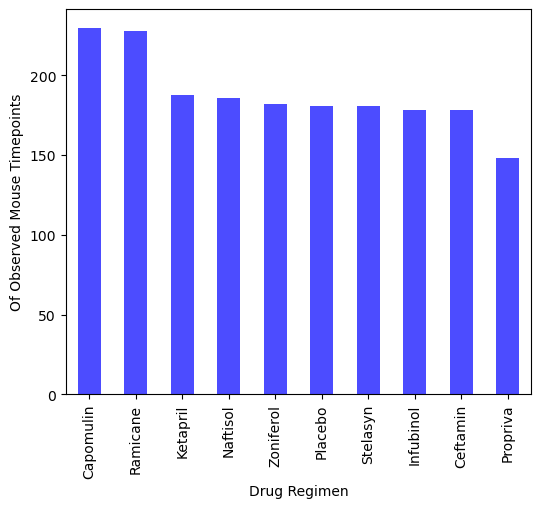

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by 'Drug Regimen' and count the number of rows
drug_regimen = clean_mouse_study['Drug Regimen'].value_counts()

# Create a bar plot
drug_regimen.plot(kind='bar', color='blue', alpha=0.7, figsize=(6,5))

# Set plot labels and titleplt.title('Total Number of Rows (Mouse ID/Timepoints)for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Of Observed Mouse Timepoints')

# Display the plot
plt.show()

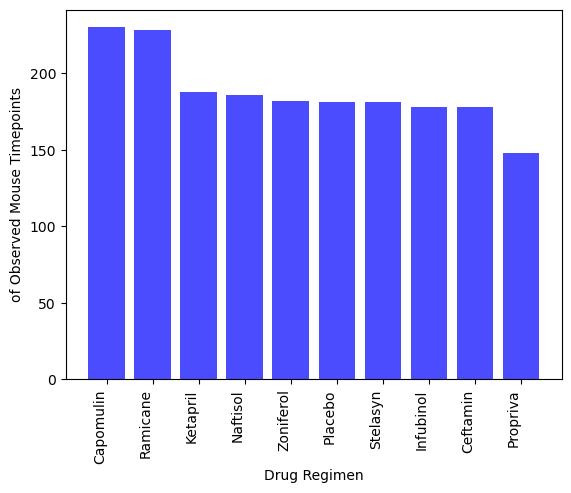

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows
regimen_counts = clean_mouse_study['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.bar(regimen_counts.index, regimen_counts, color='blue', alpha=0.7)

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()


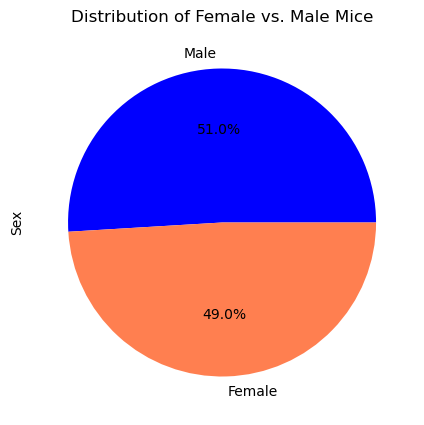

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by 'Sex' and count the number of mice for each sex
gender_distrubution = clean_mouse_study['Sex'].value_counts()

# Create a bar plot
gender_distrubution.plot(kind='pie', autopct='%1.1f%%', colors=['blue','coral'], startangle=0, figsize=(5,5))

# Set plot labels and titleplt.title('Total Number of Rows (Mouse ID/Timepoints)for Each Drug Regimen')
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')

# Display the plot
plt.show()


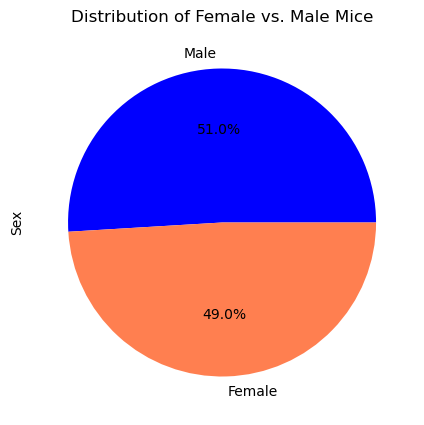

In [20]:
# Generate a pie plot showing the d
# Group by 'Sex' and count the number of mice for each sex
gender_distribution = clean_mouse_study['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'coral'], startangle=0)

# Set plot title
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Find the greatest timepoint for each mouse
max_timepoints = clean_mouse_study.groupby('Mouse ID')['Timepoint'].max()

print(max_timepoints)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


In [22]:
# Merge the group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_regimen_df = pd.merge(max_timepoints, clean_mouse_study, on=["Mouse ID", "Timepoint"])

# Display the data table for preview
print(treatments_regimen_df)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment in the treatments list
for treatment in treatments_list:
    # Subset the data for the current treatment
    subset_data = treatments_regimen_df[treatments_regimen_df['Drug Regimen'] == treatment]
    
    # Calculate the IQR for the current treatment
    q1 = subset_data['Tumor Volume (mm3)'].quantile(0.25)
    q3 = subset_data['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    
    # Determine potential outliers for the current treatment
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify potential outliers
    outliers = subset_data[
        (subset_data['Tumor Volume (mm3)'] < lower_bound) |
        (subset_data['Tumor Volume (mm3)'] > upper_bound)
    ]
    
    # Display information for the current treatment
    print(f"\nTreatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers:")
    print(outliers)
    
    # Append tumor volume data for plotting
    tumor_vol_data.append(subset_data['Tumor Volume (mm3)'])

# Display the tumor volume data for plotting
print("\nTumor Volume Data for Plotting:")
print(tumor_vol_data)




Treatment: Capomulin
IQR: 7.781863460000004
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []

Treatment: Ramicane
IQR: 9.098536719999998
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []

Treatment: Infubinol
IQR: 11.477135160000003
Potential Outliers:
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
31     c326          5    Infubinol  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
31           36.321346                 0  

Treatment: Ceftamin
IQR: 15.577752179999997
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []

Tumor Volume Data for Plotting:
[19     38.982878
24     38.939633
61     30.485985
64     37.07

Text(0, 0.5, 'Final Tumor Volume (mm3)')

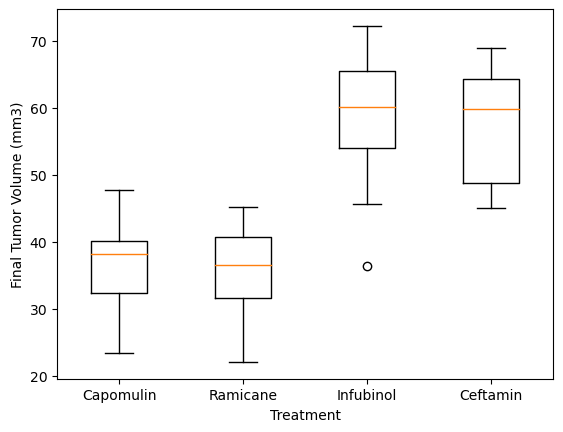

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments_list)
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')


## Line and Scatter Plots

In [25]:
capomulin_mice = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
Name: count, dtype: int64

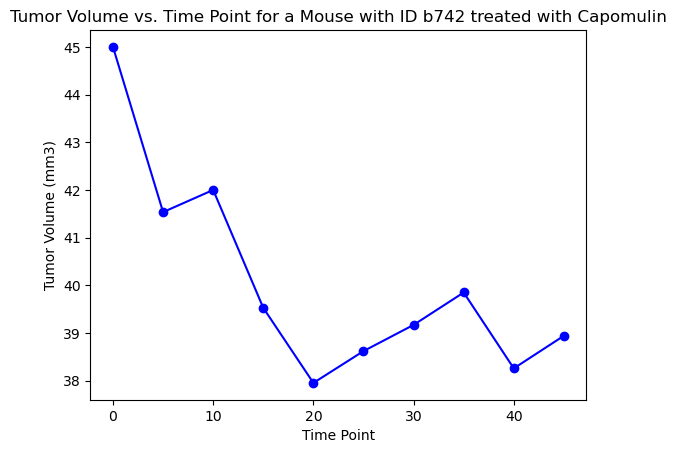

In [26]:
# Choose a single mouse treated with Capomulin (replace 'm601' with the desired Mouse ID)
selected_mouse_data = clean_mouse_study[(clean_mouse_study['Drug Regimen'] == 'Capomulin') & (clean_mouse_study['Mouse ID'] == 'b742')]

# Check if the selected mouse data is not empty
if not selected_mouse_data.empty:
    # Plot tumor volume vs. time point
    plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

    # Set plot labels and title
    plt.title('Tumor Volume vs. Time Point for a Mouse with ID b742 treated with Capomulin')
    plt.xlabel('Time Point')
    plt.ylabel('Tumor Volume (mm3)')

    # Display the plot
    plt.show()

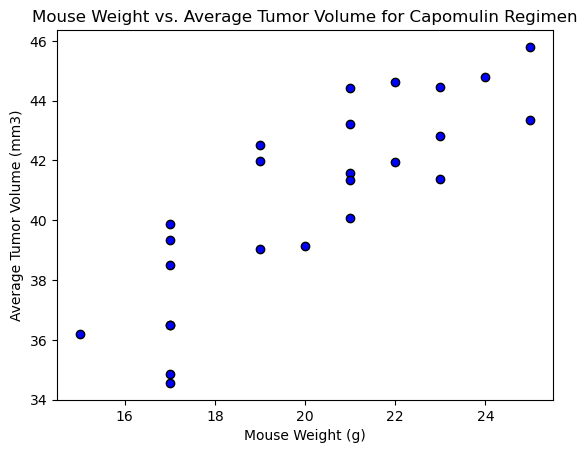

In [27]:
capomulin_data = clean_mouse_study[clean_mouse_study['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Set plot labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Plot the regression line
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')

# Display the plot
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient: {r_value}")